In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA

In [2]:
path = r'/Users/rajanand/Dropbox (MIT)/Personal Research/Datathon'
covid = pd.read_csv(os.path.join(path, 'owid-covid-data.csv'))
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
### Creating a total impact index for corona encompassing important variables like 
covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d')
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [4]:
## Unique countries in the dataset
cnty_groups = covid.groupby('location')
freq = 'W'
master_df = pd.DataFrame()
for name, group in cnty_groups:
    
    dummy_df = pd.DataFrame({'Date': group.resample(freq, on='date').total_cases.sum().index, 
                            'total_cases': group.resample(freq, on='date').total_cases.mean(),
                            'new_cases':group.resample(freq, on='date').new_cases.sum(),
                            'total_deaths':group.resample(freq, on='date').new_cases.sum(),
                            'new_deaths':group.resample(freq, on='date').new_deaths.sum(),
                            'reproduction_rate':group.resample(freq, on='date').reproduction_rate.mean(),
                            'new_tests':group.resample(freq, on='date').new_tests.sum(),
                            'total_tests':group.resample(freq, on='date').total_tests.mean(),
                            'positive_rate':group.resample(freq, on='date').positive_rate.mean(),
                            'total_vaccinations':group.resample(freq, on='date').total_vaccinations.mean(),
                            'total_vaccinations_per_hundred':group.resample(freq, on='date').total_vaccinations_per_hundred.mean(),
                            'stringency_index':group.resample(freq, on='date').stringency_index.mean(),
                            'population':group.resample(freq, on='date').population.mean(),
                            'median_age':group.resample(freq, on='date').median_age.mean(),
                            'gdp_per_capita':group.resample(freq, on='date').gdp_per_capita.mean(),
                            'population_density':group.resample(freq, on='date').population_density.mean(),
                            'cardiovasc_death_rate':group.resample(freq, on='date').cardiovasc_death_rate.mean(),
                            'life_expectancy':group.resample(freq, on='date').life_expectancy.mean(),
                            'human_development_index':group.resample(freq, on='date').human_development_index.mean()})
    
    dummy_df['location'] = [name]*dummy_df.shape[0]
    
    master_df = pd.concat([master_df, dummy_df])
    
master_df.reset_index(drop=True)


,Date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,positive_rate,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,median_age,gdp_per_capita,population_density,cardiovasc_death_rate,life_expectancy,human_development_index,location
0,2020-03-01,1.000000,1.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,11.108571,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan
1,2020-03-08,3.428571,4.0,4.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,27.780000,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan
2,2020-03-15,11.714286,11.0,11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,30.954286,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan
3,2020-03-22,25.714286,18.0,18.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,40.875714,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan
4,2020-03-29,79.428571,84.0,84.0,3.0,1.440000,0.0,NaN,NaN,NaN,NaN,57.937143,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,2020-11-22,9054.428571,391.0,391.0,11.0,1.204286,7050.0,157158.000000,0.053429,NaN,NaN,67.590000,14862927.0,19.6,1899.775,42.729,307.846,61.49,0.535,Zimbabwe
8604,2020-11-29,9599.285714,602.0,602.0,7.0,1.210000,7914.0,164440.285714,0.074571,NaN,NaN,67.590000,14862927.0,19.6,1899.775,42.729,307.846,61.49,0.535,Zimbabwe
8605,2020-12-06,10359.142857,896.0,896.0,16.0,1.205714,8829.0,173227.285714,0.086571,NaN,NaN,67.590000,14862927.0,19.6,1899.775,42.729,307.846,61.49,0.535,Zimbabwe
8606,2020-12-13,11066.571429,528.0,528.0,16.0,1.191429,10474.0,183247.285714,0.071000,NaN,NaN,67.590000,14862927.0,19.6,1899.775,42.729,307.846,61.49,0.535,Zimbabwe


In [5]:
group.shape

(276, 52)

In [6]:
master_df.dropna(how='all', axis=1, inplace=True)
master_df.head()

,Date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,positive_rate,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,median_age,gdp_per_capita,population_density,cardiovasc_death_rate,life_expectancy,human_development_index,location
date,,,,,,,,,,,,,,,,,,,,
2020-03-01,2020-03-01,1.000000,1.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,11.108571,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan
2020-03-08,2020-03-08,3.428571,4.0,4.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,27.780000,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan
2020-03-15,2020-03-15,11.714286,11.0,11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,30.954286,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan
2020-03-22,2020-03-22,25.714286,18.0,18.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,40.875714,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan
2020-03-29,2020-03-29,79.428571,84.0,84.0,3.0,1.44,0.0,NaN,NaN,NaN,NaN,57.937143,38928341.0,18.6,1803.987,54.422,597.029,64.83,0.498,Afghanistan


In [8]:
### Applying a principal component analysis on dataset
relevant_col = ['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million']

us_data = covid[covid['location'] == 'United States'][relevant_col]
us_data.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
55017,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN
55018,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN
55019,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN
55020,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN
55021,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN


In [9]:
us_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
count,3.490000e+02,348.000000,343.000000,311.000000,311.000000,343.000000,349.000000,348.000000,343.000000,311.000000,311.000000,343.000000
mean,5.168771e+06,59819.364943,58820.886321,154772.585209,1136.601286,1011.936700,15615.498544,180.721713,177.705198,467.587154,3.433807,3.057175
std,5.393523e+06,63754.900991,61127.430447,93856.544216,779.437880,720.194274,16294.501325,192.611454,184.673546,283.552264,2.354810,2.175818
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.003000,0.000000,0.000000
25%,7.432100e+05,21358.000000,22007.000000,92236.000000,599.000000,668.500000,2245.329000,64.525000,66.486000,278.656000,1.810000,2.019500
50%,3.426986e+06,39381.000000,41244.286000,155793.000000,987.000000,867.143000,10353.349000,118.975000,124.604000,470.670000,2.982000,2.620000
75%,7.656408e+06,65943.000000,65017.357500,220391.000000,1456.000000,1433.714500,23130.957000,199.222250,196.425500,665.828500,4.399000,4.331500
max,2.081714e+07,297491.000000,219345.857000,353483.000000,3750.000000,2714.857000,62891.159000,898.757000,662.671000,1067.916000,11.329000,8.202000


In [11]:
us_data = covid[covid['location'] =='United States'][relevant_col]
us_data = us_data.fillna(method='ffill').dropna(how='any',axis=0)
us_data.shape
pca = PCA().fit(us_data)
print(pca.explained_variance_ratio_)
print(pca.components_.T)

[9.99927551e-01 4.80321164e-05 2.16464185e-05 2.75040497e-06
 1.88081475e-08 1.70339655e-09 3.40277618e-21 2.89685851e-21
 2.78321882e-21 2.64071038e-21 2.60168758e-21 2.17946854e-21]
[[ 9.99745197e-01 -6.99348621e-04  2.22035267e-02  2.63197990e-03
   3.44980486e-05  6.34354577e-06  1.63033806e-04 -9.78269701e-04
   4.52170755e-04 -8.47343068e-05  1.82383821e-03  2.14604064e-03]
 [ 1.08231430e-02  5.75429203e-01 -5.41790827e-01  6.12412098e-01
  -6.39838117e-03  1.13202599e-02  1.10519213e-03 -9.07640154e-04
   1.90591028e-03 -4.93101286e-04 -1.70916852e-03  5.33803827e-04]
 [ 1.05968515e-02  4.92400158e-01 -3.68149840e-01 -7.88426185e-01
  -1.05965046e-02 -1.25786821e-02  1.20411167e-03 -1.35038798e-03
  -1.44597764e-03 -1.81673197e-03  2.04951776e-04 -6.48290661e-04]
 [ 1.64612155e-02 -6.52910627e-01 -7.55248546e-01 -5.49248732e-02
   3.22433973e-03 -3.32775170e-04  8.89401060e-04  2.02361285e-03
   9.88448620e-04 -1.50925473e-03  9.65273334e-04 -2.33314022e-04]
 [ 6.69076676e-05  8

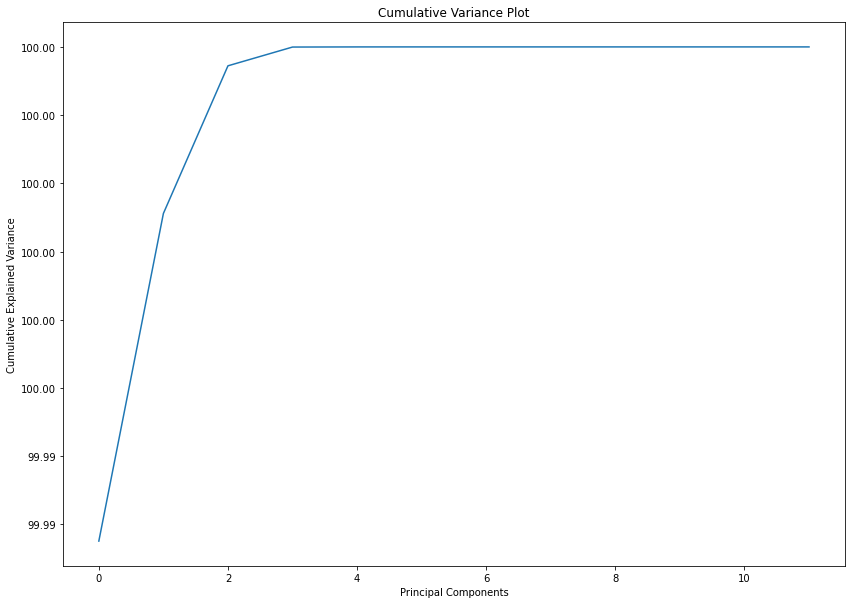

In [38]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(14,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.savefig('cumulative.jpeg')

<ipython-input-48-1f18247d5b83>:3: RuntimeWarning: invalid value encountered in log
  plt.plot(covid.date[us_data.index],[np.log(x) for x in pcs[:,0]])


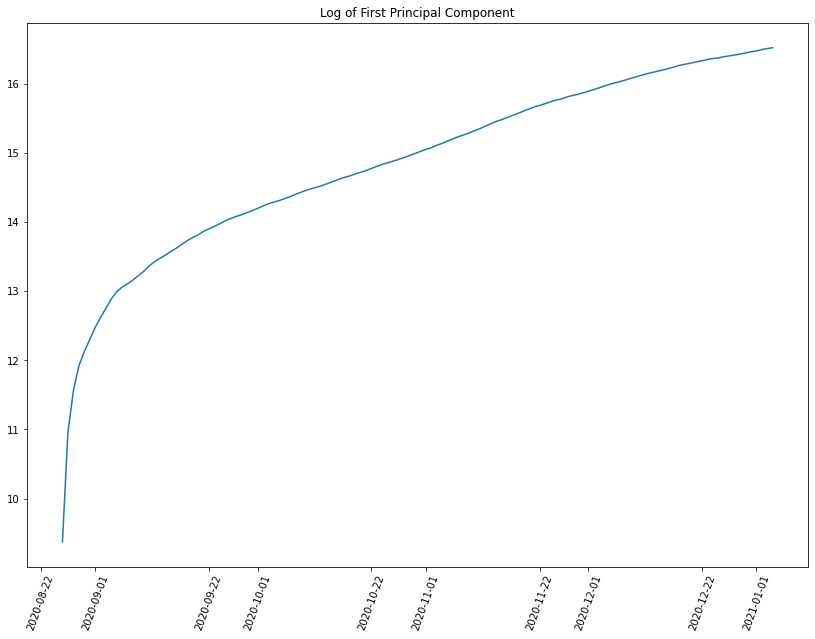

In [48]:
pcs = pca.transform(us_data)
plt.subplots(figsize=(14,10))
plt.plot(covid.date[us_data.index],[np.log(x) for x in pcs[:,0]])
plt.title('Log of First Principal Component')
plt.xticks(rotation=70)
plt.show()

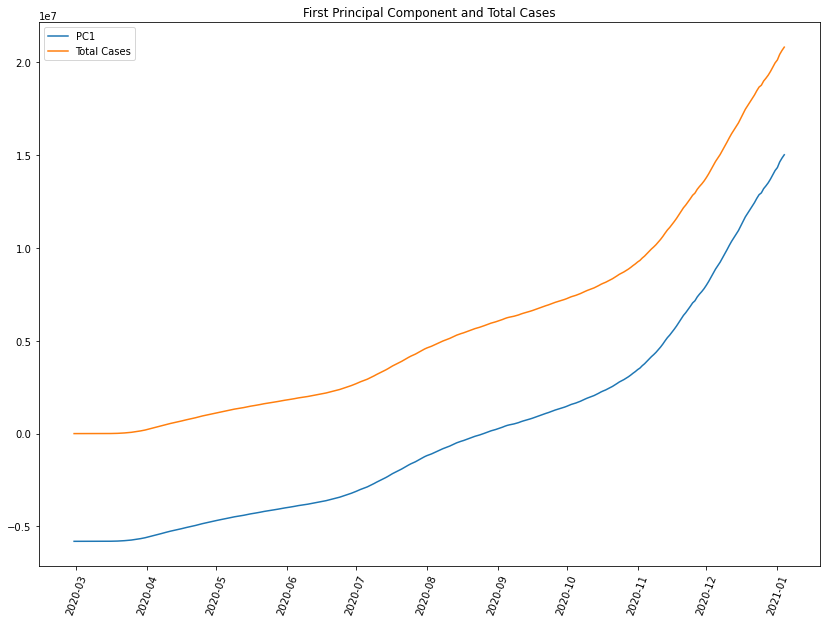

In [56]:
pcs = pca.transform(us_data)
plt.subplots(figsize=(14,10))
plt.plot(covid.date[us_data.index],pcs[:,0], label='PC1')
plt.plot(covid.date[us_data.index],us_data['total_cases'], label='Total Cases')
plt.title('First Principal Component and Total Cases')
plt.xticks(rotation=70)
plt.legend()
plt.savefig('FirstPCA.jpeg')
plt.show()

In [57]:
## Making PCA index for each country
country_groups = covid.groupby('location')
var_dict = {'country':[], 'var':[],'first_comp':[]}
for country, group in country_groups:
    dummy_df = group[relevant_col].fillna(method='ffill').dropna(how='any', axis=0)
    if dummy_df.shape[0] < 50:
        continue
    pca = PCA(n_components=4).fit(dummy_df)
    var_dict['country'].append(country)
    var_dict['var'].append(pca.explained_variance_ratio_[0])
    var_dict['first_comp'].append(pca.components_.T[0,0])

In [58]:
min(var_dict['first_comp'])

-0.9994612049199973

In [59]:
max(var_dict['first_comp'])

0.9998845774339964

In [60]:
### Regression analysis with Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


from sklearn.linear_model import LinearRegression    

In [61]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

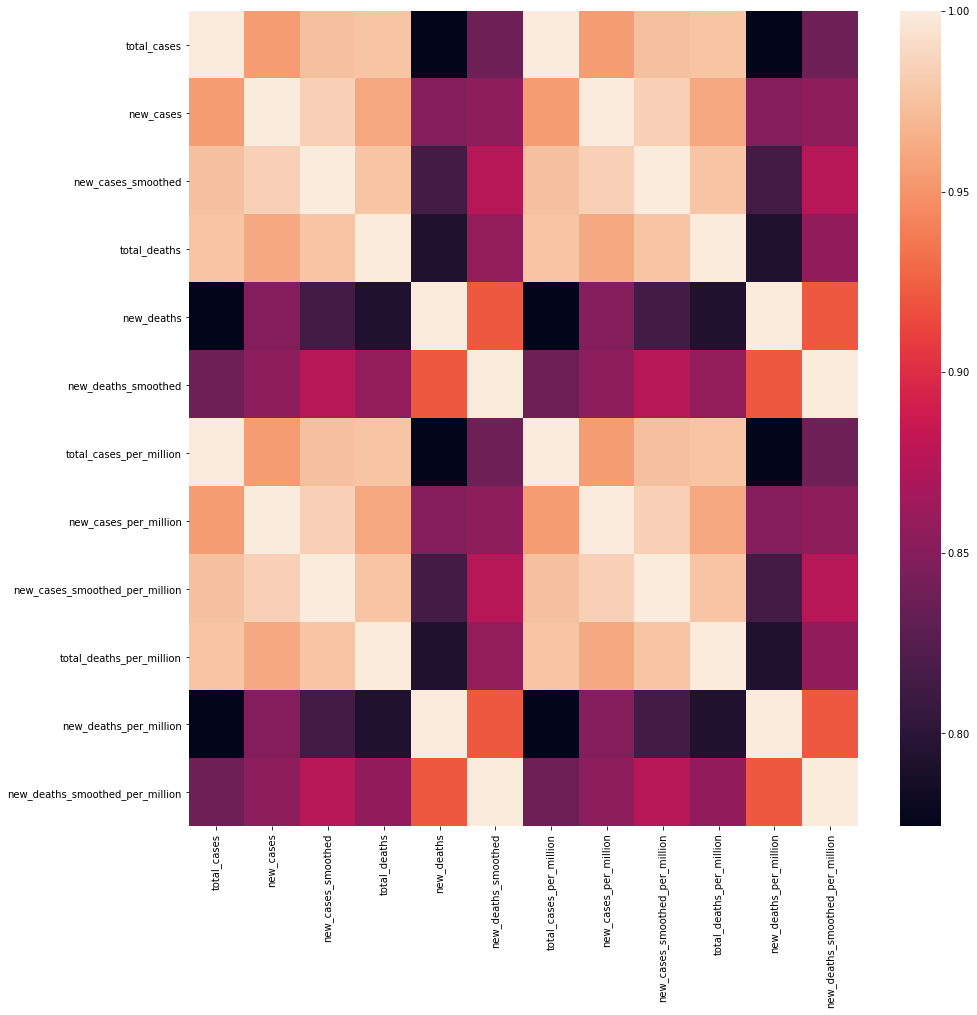

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million']
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(covid[covid.location=="World"][cols].corr(), ax = ax)
plt.savefig('Covid.jpeg')

In [63]:
regression_features = ['total_cases','reproduction_rate','new_tests','total_tests','total_tests_per_thousand','stringency_index',\
                      'population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty',\
                      'extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities',\
                      'life_expectancy','human_development_index']

df = covid[covid['location']=='World'][regression_features]
df['total_cases'] = df.total_cases.shift(-5)
df = df.fillna(method='ffill').dropna(how='all',axis=1).dropna(how='any',axis=0)
df.head()

,total_cases,reproduction_rate,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy
56967,5578.0,3.14,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58
56968,6167.0,3.27,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58
56969,8235.0,3.39,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58
56970,9927.0,3.44,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58
56971,12038.0,3.45,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58


In [64]:
print(df.shape)
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

train_X = train_set.drop(columns='total_cases')
test_X = test_set.drop(columns='total_cases')

train_Y = train_set['total_cases']
test_Y = test_set['total_cases']
train_X.head()

(348, 16)


,reproduction_rate,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy
57046,1.18,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58
57307,1.04,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58
56985,1.48,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58
57259,1.08,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58
57071,1.04,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,10.0,233.07,8.51,6.434,34.635,60.13,72.58


In [65]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(LinearRegression(), train_X, train_Y, scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [25911337.15631191 21532941.70895936 24125014.1904902  23543924.58675077]
Mean: 23778304.410628058


In [68]:
calc_vif(train_X)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,reproduction_rate,1.000000
1,population,0.000000
2,population_density,1.500000
3,median_age,0.269103
4,aged_65_older,0.553531
5,aged_70_older,4.542056
6,gdp_per_capita,1.071665
7,extreme_poverty,0.000000
8,extreme_poverty,0.000000
9,cardiovasc_death_rate,1.823640


In [70]:
import statsmodels.api as sm

# Note the difference in argument order

model = sm.OLS(train_Y, train_X).fit()
predictions = model.predict(test_X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     29.82
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.18e-07
Time:                        19:25:42   Log-Likelihood:                -4470.8
No. Observations:                 243   AIC:                             8946.
Df Residuals:                     241   BIC:                             8953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
reproduction_rate      -1.946e+07   3.56e+06     -5.461      0.000   -2.65e+07   -1.24e+07
population                 0.0062      0.001     10.601      0.000       0.005       0.007
population_density       2.24e-07    4.1e-08      5.461      0.000    1.43e-07    3.05e-07
median_age              1.036e-07    1.9e-08      5.461      0.000    6.62e-08    1.41e-07
aged_65_older           4.564e-08   8.36e-09      5.461      0.000    2.92e-08    6.21e-08
aged_70_older           5.743e-08   1.05e-08      5.461      0.000    3.67e-08    7.82e-08
gdp_per_capita          8.501e-05   1.56e-05      5.461      0.000    5.43e-05       0.000
extreme_poverty         7.431e-08   1.36e-08      5.461      0.000    4.75e-08    1.01e-07
extreme_poverty         7.431e-08   1.36e-08      5.461      0.000    4.75e-08    1.01e-07
cardiovasc_death_rate    2.28e-06   4.17e-07      5.461      0.000    1.46e-06     3.1e-06
diabetes_prevalence     7.352e-08   1.35e-08      5.461      0.000     4.7e-08       1e-07
female_smokers           5.24e-08    9.6e-09      5.461      0.000    3.35e-08    7.13e-08
male_smokers            3.914e-07   7.17e-08      5.461      0.000     2.5e-07    5.33e-07
handwashing_facilities   3.88e-07    7.1e-08      5.461      0.000    2.48e-07    5.28e-07
life_expectancy         5.369e-07   9.83e-08      5.461      0.000    3.43e-07    7.31e-07
==============================================================================
Omnibus:                       23.696   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.372
Skew:                           0.825   Prob(JB):                     6.90e-07
Kurtosis:                       2.718   Cond. No.                     3.84e+41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
### Fitting Ridge Regression
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(train_X, train_Y)

predictions = clf.predict(test_X)

In [72]:
clf.score(train_X, train_Y)

0.11004874705435497

In [73]:
clf.coef_

array([-1.90351397e+07,  0.00000000e+00, -1.45977914e-20, -3.64944784e-21,
       -1.82472392e-21,  1.82472392e-21, -3.73703459e-18,  0.00000000e+00,
        0.00000000e+00,  5.83911655e-20,  1.82472392e-21, -1.82472392e-21,
        0.00000000e+00,  0.00000000e+00,  1.46578557e-20])